In [1]:
library("checkpoint")
checkpoint("2019-04-23")
library(ggplot2)
library(dplyr)
#install.packages('textcat')
library(textcat)


checkpoint: Part of the Reproducible R Toolkit from Microsoft
https://mran.microsoft.com/documents/rro/reproducibility/
Scanning for packages used in this project
- Discovered 15 packages
All detected packages already installed
checkpoint process complete
---

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Semantic analysis
#### SENTIMENT

In [2]:
data <- read.csv('abstracts_scored.csv', stringsAsFactors = FALSE)

### Exclude missing abstracts
nrow(data) #2926
sum(data$WordCount==0) #1020
sum(is.na(data$IndexedAbstract)) #1020
table(data$Tag, is.na(data$IndexedAbstract))
#                 FALSE TRUE
# OpenScience       674  204
# Reproducibility  1232  815
data <- filter(data, WordCount>0)

[1] 2926

[1] 1020

[1] 0

                 
                  FALSE
  OpenScience       879
  Reproducibility  2047

In [3]:
#Exclude non-English titles
data$Language <- textcat(as.character(data$Title))
table(data$Language)
addmargins(table(data$Tag, data$Language=='english'))
data <- filter(data, Language=='english')


     afrikaans       albanian         breton        catalan         danish 
             2              1              1             21              9 
         dutch        english      esperanto         french        frisian 
             2           1764              1              6              3 
        german     indonesian        italian          latin           manx 
            28              2              1              7              2 
middle_frisian     portuguese       romanian      rumantsch          scots 
             4              9              5              4             14 
  scots_gaelic   slovak-ascii        spanish        swedish 
             1              2             13              4 

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘vctrs’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.matrix(obj)

                 
                  FALSE TRUE Sum 
  OpenScience      79    595  674
  Reproducibility  63   1169 1232
  Sum             142   1764 1906

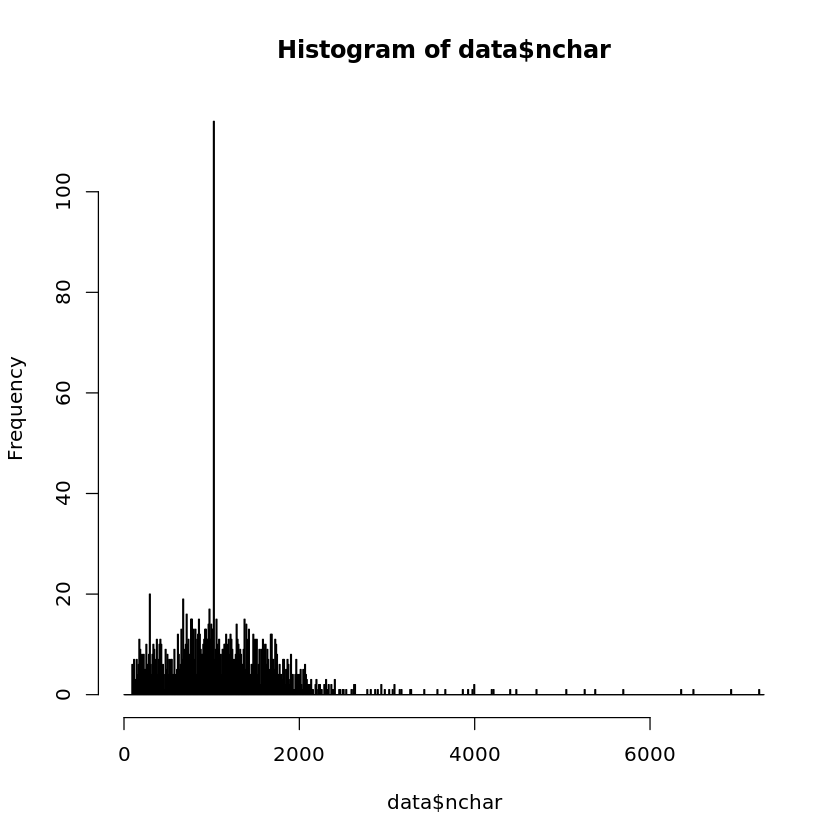

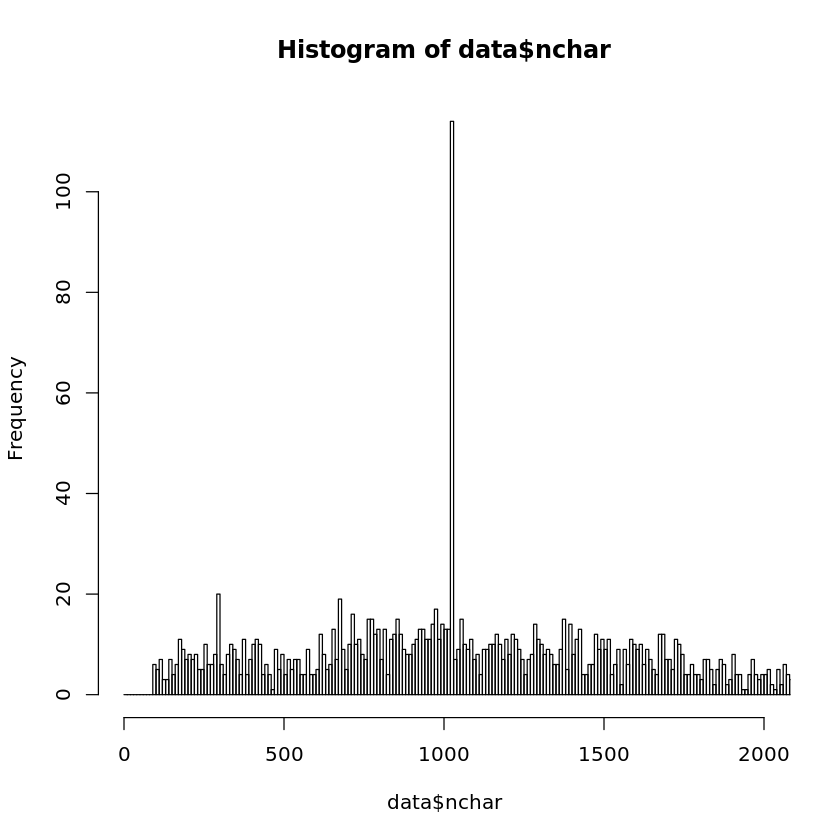

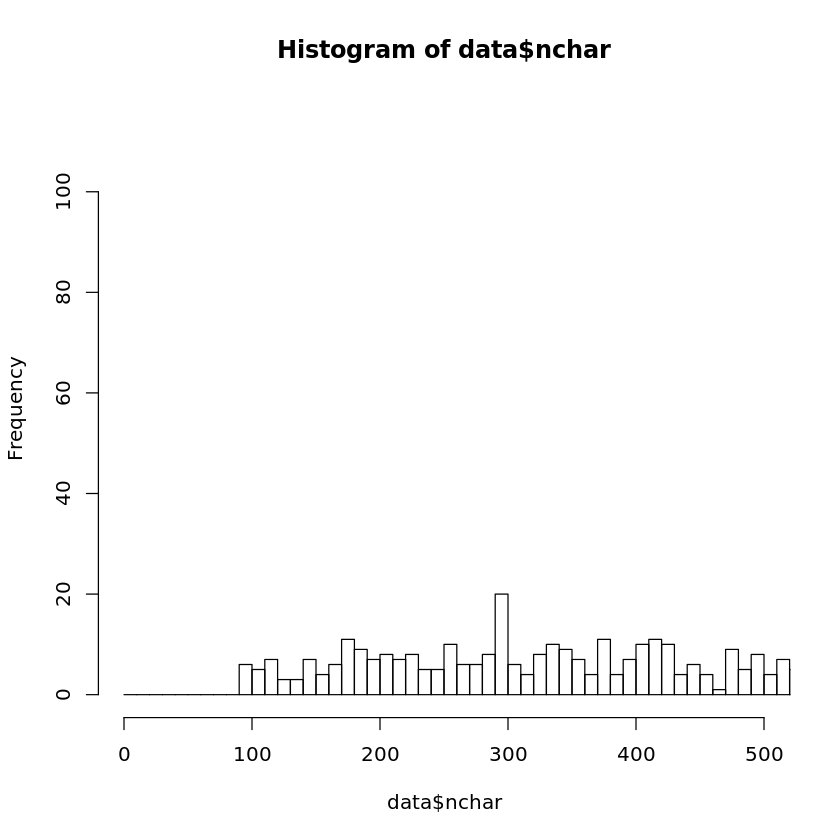

In [4]:
#check for weirdly short abstracts
data$nchar <- nchar(data$IndexedAbstract)
hist(data$nchar, breaks=seq(0,7300,10)) #spike at 1023 due to truncation of some abstracts
hist(data$nchar, xlim=c(0,2000), breaks=seq(0,7300,10))
hist(data$nchar, xlim=c(0,500), breaks=seq(0,7300,10)) #no small weird values

In [5]:
#look at boxplots and histograms of sentiment by field

pdf('figures/Postivity_FieldFemale.pdf', width=5, height=4)
data$femaleLead <- (data$X1st==1) | (data$last==1)
ggplot(filter(data, !is.na(femaleLead)), aes(x=femaleLead, y=PositivityQDAP, fill=femaleLead)) + 
  geom_boxplot() + facet_grid(. ~ Tag) + scale_fill_manual(values=c('lightblue','pink')) + guides(fill=FALSE)
dev.off()

#no noticable gender differences, but sizeable difference between fields (Reproducibility less positive)

png 
  2

In [6]:
### QDAP

pdf('figures/SentimentPositivityQDAP_hist.pdf', width=10, height=5)
par(mfrow=c(1,2))
#Sentiment
tmp <- filter(data, SentimentQDAP >= -0.2)
hist(tmp$SentimentQDAP[tmp$Tag=='OpenScience'], freq=FALSE, breaks=seq(-0.2,0.5,0.03), col=rgb(0,1,1,0.5), main='Sentiment', xlab='QDAP Sentiment Score')
hist(tmp$SentimentQDAP[tmp$Tag=='Reproducibility'], freq=FALSE, breaks=seq(-0.2,0.5,0.03), col=rgb(1,0,1,0.5), add=TRUE)
legend('topright', legend=c('Open Science', 'Reproducibility'), fill=c(rgb(0,1,1,0.5), rgb(1,0,1,0.5)))
#Positivity
hist(tmp$PositivityQDAP[tmp$Tag=='OpenScience'], freq=FALSE, breaks=seq(-0.2,0.5,0.03), col=rgb(0,1,1,0.5), ylim=c(0,9), main='Positivity', xlab='QDAP Positivity Score')
hist(tmp$PositivityQDAP[tmp$Tag=='Reproducibility'], freq=FALSE, breaks=seq(-0.2,0.5,0.03), col=rgb(1,0,1,0.5), add=TRUE)
legend('topright', legend=c('Open Science', 'Reproducibility'), fill=c(rgb(0,1,1,0.5), rgb(1,0,1,0.5)))
dev.off()

png 
  2

In [7]:
### GI

pdf('figures/SentimentPositivityGI_hist.pdf', width=10, height=5)
par(mfrow=c(1,2))
#Sentiment
tmp <- filter(data, SentimentGI >= -0.2)
hist(tmp$SentimentGI[tmp$Tag=='OpenScience'], freq=FALSE, breaks=seq(-0.2,0.6,0.03), col=rgb(0,1,1,0.5), main='Sentiment', xlab='GI Sentiment Score')
hist(tmp$SentimentGI[tmp$Tag=='Reproducibility'], freq=FALSE, breaks=seq(-0.2,0.6,0.03), col=rgb(1,0,1,0.5), add=TRUE)
legend('topright', legend=c('Open Science', 'Reproducibility'), fill=c(rgb(0,1,1,0.5), rgb(1,0,1,0.5)))
#Positivity
hist(tmp$PositivityGI[tmp$Tag=='OpenScience'], freq=FALSE, breaks=seq(-0.2,0.6,0.03), col=rgb(0,1,1,0.5), main='Positivity', xlab='GI Positivity Score')
hist(tmp$PositivityGI[tmp$Tag=='Reproducibility'], freq=FALSE, breaks=seq(-0.2,0.6,0.03), col=rgb(1,0,1,0.5), add=TRUE)
legend('topright', legend=c('Open Science', 'Reproducibility'), fill=c(rgb(0,1,1,0.5), rgb(1,0,1,0.5)))
dev.off()

png 
  2

In [8]:
### Team Size

pdf('figures/SentimentPositivity_TeamSize.pdf', width=10, height=5)
ggplot(data, aes(x=authorCount, y=SentimentQDAP, color=Tag, group=interaction(authorCount,Tag))) + 
  geom_boxplot() + geom_smooth() + xlim(0,10) + theme(legend.position='bottom')
ggplot(data, aes(x=authorCount, y=PositivityQDAP, color=Tag, group=interaction(authorCount,Tag))) + 
  geom_boxplot() + geom_smooth() + xlim(0,10) + theme(legend.position='bottom')
dev.off()

#no noticeable effect of team size within either literature.
#differences between the two fields are preserved across different team sizes

Warning message:
“Removed 100 rows containing missing values (stat_boxplot).”`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 100 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_boxplot).”

Warning message:
“Removed 100 rows containing missing values (stat_boxplot).”`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 100 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_boxplot).”

png 
  2

### CUSTOM DICTIONARIES

In [9]:
data <- read.csv('output/abstracts_scored_custom.csv', stringsAsFactors = FALSE)

#make sure variable names match constructs
dictionary <- read.csv('input/Lancet Dictionaries.csv', stringsAsFactors = FALSE)
dictionary <- dictionary[,1:2]
constructs <- levels(as.factor(dictionary$IndivConstruct)) 

neaten <- function(x){
  x <- gsub(pattern = " ", replacement = "", x) #remove spaces
  x <- gsub(pattern = "/", replacement = "_", x) #replace slashes
  x <- gsub(pattern = "-", replacement = "", x) #replace dashes
  return(x)
}
constructs2 <- neaten(constructs)

### Exclude missing abstracts
table(data$Tag, data$IndexedAbstract=='') #how many excluded/included?
#                  FALSE TRUE
# OpenScience       674  205
# Reproducibility  1232  815
data <- filter(data, (IndexedAbstract != ''))

                 
                  FALSE TRUE
  OpenScience       674  205
  Reproducibility  1232  815

In [10]:
###Exclude non-English titles

data$Language <- textcat(as.character(data$Title))
table(data$Language)
# afrikaans       albanian         breton        catalan         danish          dutch        english      esperanto 
# 2              1              1             21              9              2           1764              1 
# french        frisian         german     indonesian        italian          latin           manx middle_frisian 
# 6              3             28              2              1              7              2              4 
# portuguese       romanian      rumantsch          scots   scots_gaelic   slovak-ascii        spanish        swedish 
# 9              5              4             14              1              2             13              4 
table(data$Tag, data$Language!='english') #how many excluded/included?
#                 FALSE TRUE
# OpenScience       595   79
# Reproducibility  1169   63
data <- filter(data, Language=='english')
nrow(data) #1764
table(data$Tag)
# OpenScience Reproducibility 
# 595            1169 


     afrikaans       albanian         breton        catalan         danish 
             2              1              1             21              9 
         dutch        english      esperanto         french        frisian 
             2           1764              1              6              3 
        german     indonesian        italian          latin           manx 
            28              2              1              7              2 
middle_frisian     portuguese       romanian      rumantsch          scots 
             4              9              5              4             14 
  scots_gaelic   slovak-ascii        spanish        swedish 
             1              2             13              4 

                 
                  FALSE TRUE
  OpenScience       595   79
  Reproducibility  1169   63

[1] 1764


    OpenScience Reproducibility 
            595            1169 

#### Compute composite scores

In [32]:
#Exploratory Analysis

#dat_dict2 <- filter(dat_dict, Year >= 2010, Year < 2018, authorCount <= 15)
pdf('figures/Construct_boxplots.pdf', width=4, height=6)
for(c in constructs2){
  print(c)
  data_c <- data[data[,c] > 0,] #only include observations with at least one instance of a construct word
  names(data_c)[names(data_c)==c] <- 'var'
  title_c <- paste0(c, ' (n = ',nrow(data_c),')')
  print(ggplot(data_c, aes(x=Tag, y=var, group=Tag)) + geom_boxplot() + ylab(c) + ggtitle(title_c)) 
}
dev.off()

[1] "Collaboration"
[1] "Competiition_Achievement"
[1] "Femininewords"
[1] "IndividualfocusedPronouns"
[1] "Innovation"
[1] "Integrity"
[1] "Learning"
[1] "Masculinewords"
[1] "Openness"
[1] "Otherfocusedpronouns"
[1] "Policing"
[1] "ProsocialMotives"
[1] "Reproducibility"
[1] "TeamfocusedPronouns"
[1] "Team_Communality"


png 
  2

In [11]:
# Histograms for Pro-Social Construct

data_OS <- filter(data, Tag=='OpenScience')
data_RR <- filter(data, Tag=='Reproducibility')

pdf('figures/ProSocialHist.pdf', width=6, height=5)
angle <- c(45,-45)
hist(data_RR$ProsocialMotives, border='gray', main='Distribution of Pro-Social Motives Construct Score', xlab='Pro-Social Motives Construct Score', breaks=seq(0,0.2,0.01))
hist(data_OS$ProsocialMotives, border='black', add=TRUE, breaks=seq(0,0.2,0.01))
legend('topright',legend=c('Open Science','Reproducibility'),fill='white',border=c('black','gray'))
# hist(dat_dict_RR[,c], angle=angle[2], density=30, col='gray', main='Distribution of Pro-Social Motives Construct Score', xlab='Pro-Social Motives Construct Score', breaks=seq(0,0.2,0.01))
# hist(dat_dict_OS[,c], angle=angle[1], density=30, col='turquoise', add=TRUE, breaks=seq(0,0.2,0.01))
# legend('topright',legend=c('Open Science','Reproducibility'),fill=c('turquoise','gray'),angle=angle,density=30)
dev.off()

png 
  2

In [36]:
# Pro-social word density
mean(data_OS$ProsocialMotives)*100 #2.380103
median(data_OS$ProsocialMotives)*100 #1.818182
mean(data_RR$ProsocialMotives)*100 #0.9095105
median(data_RR$ProsocialMotives)*100 #0

# Test for Differences in Pro-Social Construct Score
mean_diff <- mean(data_OS$ProsocialMotives) - mean(data_RR$ProsocialMotives) #0.01470592
med_diff <- median(data_OS$ProsocialMotives) - median(data_RR$ProsocialMotives) #0.01818182

#perform permutation test
M <- 100000
labels_true <- data$Tag
n <- length(data$Tag)
mean_diff_null <- rep(NA, M) #construct the null distribution for the difference in means
med_diff_null <- rep(NA, M) #construct the null distribution for the difference in medians
for(m in 1:M){
  #print(m)
  labels_m <- sample(labels_true, n, replace=FALSE)
  data_OS_m <- data[labels_m=='OpenScience',]
  data_RR_m <- data[labels_m=='Reproducibility',]
  mean_diff_null[m] <- mean(data_OS_m$ProsocialMotives) - mean(data_RR_m$ProsocialMotives)
  med_diff_null[m] <- median(data_OS_m$ProsocialMotives) - median(data_RR_m$ProsocialMotives)
}

#p-value (percent of times the permutation-based mean/median difference exceeds the observed one)
mean(abs(mean_diff_null) > abs(mean_diff)) #0 (< 1/100000 = 1e-05)
mean(abs(med_diff_null) > abs(med_diff)) #0 (< 1/100000 = 1e-05)

[1] 2.378348

[1] 1.818182

[1] 0.9091113

[1] 0

[1] 0

[1] 0

In [37]:
# Test for Differences in Use of Any Pro-Social Words

#what percentage of papers use ANY pro-social words?
tab <- table(data$ProsocialMotives > 0, data$Tag)
tab
#           OpenScience Reproducibility
# FALSE         141             654
# TRUE          454             515
tab/matrix(colSums(tab), nrow=2, ncol=2, byrow=TRUE)
#         OpenScience Reproducibility
# FALSE   0.2369748       0.5594525
# TRUE    0.7630252       0.4405475


# % of papers with any pro-social words in the abstract
n_OS <- (tab[2,1]+tab[1,1])
n_RR <- (tab[2,2]+tab[1,2])
n1_OS <- tab[2,1]
n1_RR <- tab[2,2]
pct_OS <- n1_OS/n_OS #76%
pct_RR <- n1_RR/n_RR #44%

#H0: p_OS = p_RR
pct = (n1_OS+n1_RR)/(n_OS+n_RR)
t_compare <- (pct_OS - pct_RR)/sqrt(pct*(1-pct)*(1/n_OS + 1/n_RR))
2*pnorm(t_compare, lower.tail = FALSE) #2.737252e-38

       
        OpenScience Reproducibility
  FALSE         141             654
  TRUE          454             515

       
        OpenScience Reproducibility
  FALSE   0.2369748       0.5594525
  TRUE    0.7630252       0.4405475

[1] 6.663792e-38